In [1]:
#Importing the libraries
import pandas as pd
#Importing data into a dataframe
wine_df = pd.read_csv('winequality-red.csv', sep=';')
#The first 5 rows of data
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
#Removing spaces (" ") from column names
col_list = wine_df.columns
wine_df.columns = [col.replace(" ", "_") for col in col_list]

wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.shape

(1599, 12)

In [4]:
#Describing the dataset
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Looks like all columns are numerical. Let's check the "dtype" of columns.

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#checking the distinct values in "quality" column
wine_df.quality.unique()

array([5, 6, 7, 4, 8, 3])

The "quality" column has 6 integer values. So, this is a classification problem and we are not predicting quality as a continuous value. Instead. we have to categorize each row.

In [7]:
#Checking for missing values
wine_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values and the dtypes in all the columns are correct. So, we can go ahead and exlore the distribution of data and relationship between the variables and the quality.

### Analyzing Features
Now that your columns are ready, you want to see how different features of this dataset relate to the quality rating of the wine. A very simple way you could do this is by observing the mean quality rating for the top and bottom half of each feature. The code below does this for four features. It looks pretty repetitive right now. Can you make this more concise? 

You might challenge yourself to figure out how to make this code more efficient! But you don't need to worry too much about efficiency right now - we will cover that more in the next section.

In [8]:
#Let's create a copy of the dataframe so that the original data is saved even after the manipulations
wine_df_temp = wine_df.copy()
#Writing a function to check the mean quality rating for top and bottom halves of each feature

def wine_quality_mean(df,feature):
    
    median_feature = df[feature].median()
    
    for i, feature_value in enumerate(df[feature]):
        if feature_value >= median_feature:
            df.loc[i, feature] = "high"
        else:
            df.loc[i, feature] = "low"
    print(df.groupby(feature).quality.mean())
    return None
            

In [9]:
#Writing a function to check the mean quality rating for top and bottom halves of "alcohol"
wine_quality_mean(wine_df_temp, "alcohol")

alcohol
high    5.958904
low     5.310302
Name: quality, dtype: float64


In [10]:
#Writing a function to check the mean quality rating for top and bottom halves of "pH"
wine_quality_mean(wine_df_temp, "pH")

pH
high    5.598039
low     5.675607
Name: quality, dtype: float64


In [11]:
#Writing a function to check the mean quality rating for top and bottom halves of "residual_sugar"
wine_quality_mean(wine_df_temp, "residual_sugar")

residual_sugar
high    5.665880
low     5.602394
Name: quality, dtype: float64


In [12]:
#Writing a function to check the mean quality rating for top and bottom halves of "citric_acid"
wine_quality_mean(wine_df_temp, "citric_acid")

citric_acid
high    5.822360
low     5.447103
Name: quality, dtype: float64


In [13]:
#Checking the correlation between variables
wine_df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


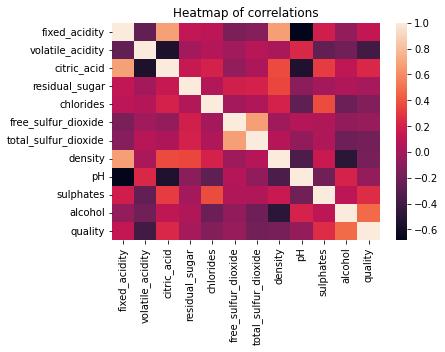

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(wine_df.corr())
plt.title("Heatmap of correlations");


From the coprelation values and the correlation map, is is evident that several pairs of variables are highly correlated. For example, fixed_acidity and citric acid. Also, some variables have high correlation with the quality whereas some do not. We will come back to this when we start iterations.

Let's now see the distributions of variables themselves and that between variables and the quality.

In [46]:
#A function to generate single-variable histograms

def make_histogram(df,feature):    
    bins = 10
    wine_df[feature].plot(kind = "hist", bins = bins)
    plt.xlabel("{feature}")
    plt.ylabel("Frequancy")
    plt.title("Distribution of {feature}")

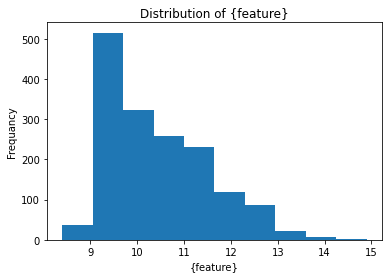

In [47]:
make_histogram(wine_df, "alcohol")

In [17]:
from sklearn.model_selection import train_test_split
y = wine_df.pop("quality")
X = wine_df
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.3, random_state = 100, stratify = y)

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "gini", max_depth = 10, random_state = 42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [19]:
model.score(X_test,y_test)

0.5916666666666667

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.5916666666666667

In [22]:
train_accuracy = []
validation_accuracy = []
for depth in range(1, 12):
    dt_model = DecisionTreeClassifier(max_depth= depth, random_state= 7)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))
    

In [23]:
score_df = pd.DataFrame({"train_accuracy":train_accuracy, "validation_accuracy": validation_accuracy})

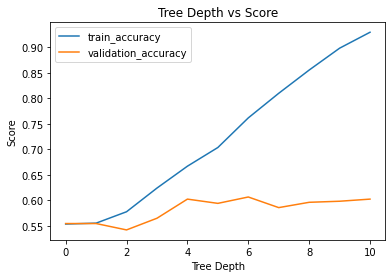

In [24]:
score_df.plot()
plt.xlabel("Tree Depth")
plt.ylabel("Score")
plt.title("Tree Depth vs Score");

In [25]:
model = DecisionTreeClassifier(max_depth= 6, random_state= 7)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7033065236818588

In [26]:
model.score(X_test, y_test)

0.59375

In [28]:
from sklearn import tree

In [29]:
decision_tree = tree.export_graphviz(model, out_file = "tree.dot", 
                                     feature_names = X_train.columns,
                                    max_depth = 3,
                                    filled = True)

In [38]:
import pydot
import graphviz

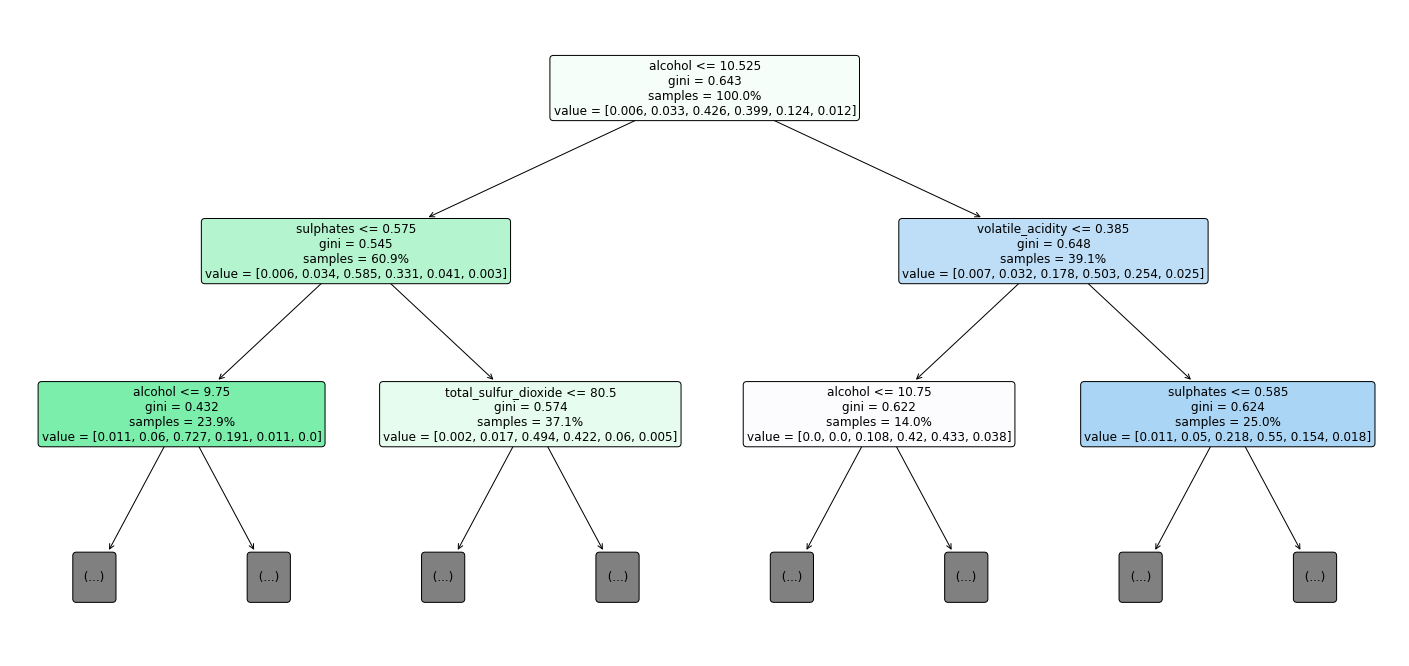

In [45]:
from sklearn.tree import plot_tree
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model,
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=2,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.model_selection import cross_val_score

In [54]:
cross_val_score(DecisionTreeClassifier(max_depth=6, random_state = 7), X_train, y_train, cv = 3)

array([0.54691689, 0.59517426, 0.57372654])

In [58]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=7), 
                   {"criterion" : ["gini", "entropy", "logloss"], 
                    "max_depth": [i for i in range(3,10)],
                    "max_features": [0.5,0.6,0.8,1]}, cv = 3, return_train_score= False)
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df[["mean_test_score"]].head()

/home/nirmal/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
84 fits failed out of a total of 252.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nirmal/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nirmal/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/nirmal/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'logloss'

  warnings.warn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006037,0.000412,0.003069,0.000077,gini,3,0.5,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.514745,0.528150,0.538874,0.527256,0.009871,45
1,0.005565,0.001047,0.002811,0.000531,gini,3,0.6,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.533512,0.549598,0.536193,0.539768,0.007037,36
2,0.004065,0.000128,0.001990,0.000040,gini,3,0.8,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.541555,0.549598,0.552279,0.547811,0.004557,27
3,0.002792,0.000038,0.001992,0.000022,gini,3,1,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.461126,0.485255,0.528150,0.491510,0.027718,56
4,0.003742,0.000010,0.001986,0.000016,gini,4,0.5,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.541555,0.538874,0.541555,0.540661,0.001264,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.002779,0.000116,0.000000,0.000000,logloss,8,1,"{'criterion': 'logloss', 'max_depth': 8, 'max_...",NaN,NaN,NaN,NaN,NaN,65
80,0.002672,0.000151,0.000000,0.000000,logloss,9,0.5,"{'criterion': 'logloss', 'max_depth': 9, 'max_...",NaN,NaN,NaN,NaN,NaN,66
81,0.003052,0.000403,0.000000,0.000000,logloss,9,0.6,"{'criterion': 'logloss', 'max_depth': 9, 'max_...",NaN,NaN,NaN,NaN,NaN,62
82,0.003522,0.000195,0.000000,0.000000,logloss,9,0.8,"{'criterion': 'logloss', 'max_depth': 9, 'max_...",NaN,NaN,NaN,NaN,NaN,57


In [61]:
df[["mean_test_score"]].sort_values(by = "mean_test_score", ascending= False)

,mean_test_score
5,0.577301
20,0.572833
26,0.569258
9,0.566577
25,0.563896
...,...
79,NaN
80,NaN
81,NaN
82,NaN


In [62]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_max_features', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [63]:
df = (df[["param_criterion", "param_max_depth", "param_max_features", "mean_test_score"]]
      .sort_values(by = "mean_test_score", ascending = False))
df.head()

,param_criterion,param_max_depth,param_max_features,mean_test_score
5,gini,4,0.6,0.577301
20,gini,8,0.5,0.572833
26,gini,9,0.8,0.569258
9,gini,5,0.6,0.566577
25,gini,9,0.6,0.563896


In [64]:
clf.best_score_

0.5773011617515639

In [65]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 0.6}

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [68]:
model_params = {
    "svm": {
        "model": SVC(gamma= "auto"),
        "params": {
            "C": [1,10,20],
            "kernel": ["rbf", "linear"]
        }
    },
    
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators" : [5,15,30],
            "max_depth" : [i for i in range(4,7)]
        }
    }
}

In [70]:
scores = []
for model, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv = 3, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        "model": model,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })

In [72]:
df = pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])
df

,model,best_score,best_params
0,svm,0.568365,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.630027,"{'max_depth': 6, 'n_estimators': 30}"


As the optimal number of trees in the random forest is 30 which is maximum provided, we can increase this params and explore for better results

So, the final model is

In [ ]:
model = RandomForestClassifier(max_depth = 6, n_estimators = 30, random_state = 7)

AxesSubplot(0.125,0.71587;0.227941x0.16413)
AxesSubplot(0.398529,0.71587;0.227941x0.16413)
AxesSubplot(0.672059,0.71587;0.227941x0.16413)


IndexError: index 3 is out of bounds for axis 1 with size 3

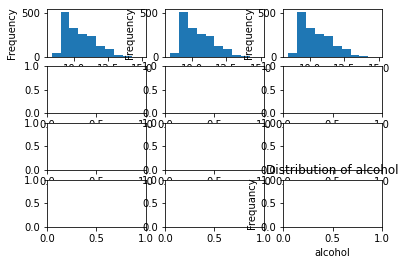

In [78]:
fig,axs = plt.subplots(4,3)
for i in range (5):
    for j in range(4):
        print(axs[i,j])
        bins = 10
        wine_df["alcohol"].plot(kind = "hist", bins = bins, ax = axs[i,j])
        plt.xlabel("alcohol")
        plt.ylabel("Frequancy")
        plt.title("Distribution of alcohol")
        

